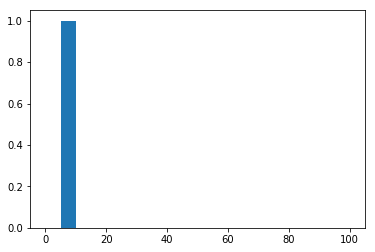

84.52070000168263
102.45237235574115
81.99943510186993
83.4313381459497
104.41183887058733
159.79754949553714
117.23786474213256
173.2897579985937
167.63667397261253
164.08659314386549
84.36568458968793
121.23336133873181
145.0924840053217
157.32695827581063
139.10594254980353
163.51437071143192
318.8488468003271
239.52733558493338
260.2259039341445
204.36675733429166
65.15374815710852
67.65615021608527
114.59451548998568
108.70366871202233
206.8253706337005
290.8608419446154
376.7254789424861
609.5135626557944
306.8284139322421
270.7206883806157
78.65455464870799
111.18655178349343
169.54760881590303
98.64178986386068
183.8616091831686
191.77731580429233
339.1165203898061
206.28079155974126
433.75067575453636
271.05594138534707
180.3198329100758
270.4816367147554
156.2883245321872
270.58143017614003
122.8898450347893
284.26439251146815
96.97550561367598
188.70035227225412
633.0434997798857
371.0657316622336
76.34224458731994
64.2580255663541
83.03043942447513
167.13074324093975
159.46

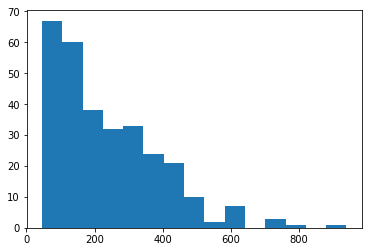

SystemExit: 

D:\python\lib\site-packages\IPython\core\interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
import pygame
import sys
from math import *
import random
import numpy as np
import time
import matplotlib.pyplot as plt

pygame.init()
width = 480
height = 660
main_surface = pygame.display.set_mode((width, height))
clock = pygame.time.Clock()
#大分子圓球 橘色
orange = (255,165,0)
#小分子圓球 紅色
red = (255,0,0)
blue = (20, 100, 150)
balls = []
blocks = []
g=0.05
bar_height = 600
# Ball Class
class Ball:
    def __init__(self, x, y, vx, vy, color, hard, radius, mass, distance):
        self.x = x
        self.y = y
        self.color = color
        self.vx = vx
        self.vy = vy
        self.hard = hard
        self.radius = radius
        self.mass = mass
        self.distance = 0

    # Draws Balls on Display Window
    def draw(self, x, y):
        pygame.draw.circle(main_surface, self.color, [int(x), int(y)], self.radius)

    # Moves the Ball around the Screen
    def move(self):
        
        if self.hard == 1:
            self.vx = 0
            self.vy = 0
        self.x = self.x + self.vx
        self.y = self.y + self.vy
        moving_distance = (self.vx ** 2 + self.vy **2) ** (1 / 2)
        self.distance += moving_distance

        if (self.x + self.radius >= width):
            self.x = width - self.radius
            self.vx = -self.vx
        if (self.radius >= self.x):
            self.x = self.radius
            self.vx = -self.vx
        if (self.y + self.radius >= height):
            self.y = height - self.radius
            self.vy = -self.vy
        if (self.radius >= self.y):
            self.y = self.radius
            self.vy=-self.vy
            
# #             define squares:
#         if (self.radius >=)
    
class Block:
    def __init__(self, x, y, width, height, color):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.color = color

    # Draws Blocks on Display Window
    def draw(self):
        pygame.draw.rect(main_surface, self.color, (self.x, self.y, self.width, self.height))

            

def collision(ball1, ball2):
    r12 = [ball2.x-ball1.x, ball2.y-ball1.y]
    v1 = [ball1.vx, ball1.vy]
    v2 = [ball2.vx, ball2.vy]
    dist = ((ball1.x - ball2.x)**2 + (ball1.y - ball2.y)**2)**0.5
    if dist <= ball1.radius + ball2.radius:
        if np.dot(v1, r12)<0 and np.dot(v2, r12)<0:
            return False
        elif np.dot(v1, r12)*np.dot(v2, r12)>0 :
            if  np.dot(v1, r12)>0 and np.dot(v2, r12)-np.dot(v1, r12)>0:
                return False
            elif np.dot(v1, r12)<0 and np.dot(v2, r12)-np.dot(v1, r12)<0:
                return False
            else:
                return True
            
        else:
            return True
    else:
        return False

#  Check Ball-block collisions 
def BlockCollision():
    for bl in balls:
        for bk in blocks:
            if bl.x > bk.x and bl.x < bk.x + bk.width:
                if bl.y + bl.radius > bk.y and bl.y + bl.radius < bk.y + bk.height/2: 
                    bl.y =  bk.y - bl.radius
                    bl.vy = -bl.vy*0.9
                if bl.y - bl.radius < bk.y + bk.height and bl.y - bl.radius > bk.y + bk.height/2:
                    bl.y =  bk.y + bk.height + bl.radius
                    bl.vy = -bl.vy*0.9  
            if bl.y > bk.y and bl.y < bk.y + bk.height:
                if bl.x + bl.radius > bk.x and bl.x + bl.radius < bk.x + bk.width/2: 
                    bl.x =  bk.x - bl.radius
                    bl.vx = -bl.vx*0.9
                if bl.x - bl.radius < bk.x + bk.width and bl.x - bl.radius > bk.x + bk.width/2:
                    bl.x =  bk.x + bk.width + bl.radius
                    bl.vx = -bl.vx*0.9
        
    

# Checks Collision Between Balls
def checkCollision():
    for i in range(len(balls)):
        for j in range(len(balls) - 1, i, -1):
            if collision(balls[i], balls[j]):
                vx1 = balls[i].vx
                vx2 = balls[j].vx
                vy1 = balls[i].vy
                vy2 = balls[j].vy
                v1 = (balls[i].vx**2+balls[i].vy**2)**0.5
                v2 = (balls[j].vx**2+balls[j].vy**2)**0.5
                if v1==0:
                    ang1=acos(vx1/0.001)
                    
                else:
                    ang1=acos(vx1/v1)
                if v2==0:
                    ang2=acos(vx2/0.001)
                else:
                    ang2=acos(vx2/v2)
                    
                m1 = balls[i].mass
                m2 = balls[j].mass
                
                if balls[i].x == balls[j].x:
                    phi = pi/2
                else:
                    phi = atan((balls[j].y-balls[i].y)/(balls[j].x-balls[i].x))
                vfx1=(v1*cos(ang1-phi)*(m1-m2)+2*m2*v2*cos(ang2-phi))*cos(phi)/(m1+m2)+v1*sin(ang1-phi)*sin(phi)
                vfy1=(v1*cos(ang1-phi)*(m1-m2)+2*m2*v2*cos(ang2-phi))*sin(phi)/(m1+m2)+v1*sin(ang1-phi)*cos(phi)
                vfx2=(v2*cos(ang2-phi)*(m2-m1)+2*m1*v1*cos(ang1-phi))*cos(phi)/(m1+m2)+v2*sin(ang2-phi)*sin(phi)
                vfy2=(v2*cos(ang2-phi)*(m2-m1)+2*m1*v1*cos(ang1-phi))*sin(phi)/(m1+m2)+v2*sin(ang2-phi)*cos(phi)
                
                balls[i].vx=vfx1
                balls[i].vy=vfy1
                balls[j].vx=vfx2
                balls[j].vy=vfy2
                




               
                    
def reset():
    global beginning_time
    global times
    beginning_time = time.time()
    times = []
    global balls, blocks
    # (x, y, vx, vy, color, hard, radius, mass)
#     running balls
    for i in range(30):
        for j in range(10):
            b = Ball(10 + i*16, 31+j*16, 1*np.random.normal(0,1), 1*np.random.normal(0,1), orange, 0, 6, 2, 0)
            balls.append(b)
        
    
#     blocks:(x, y, width, height, color):           
    for i in range(12):
        
        for j in range(4):
            b = Block(10+40*i, 200+80*j, 20, 30, blue)
            blocks.append(b)
            
    for i in range(13):
        for j in range(3):
            b = Block(-10+40*i, 240+80*j, 20, 30, blue)
            blocks.append(b)
            
#     for i in range(7):
#         for j in range(3):
#             b = Block(60+60*i-20, 250+100*j, 40, 40, blue)
#             blocks.append(b)
            

#     static balls
#     for i in range(8):
#         for j in range(4):
#             b = Ball(30+60*i, 200+90*j, 0, 0, blue, 1, 20, 100)
#             balls.append(b)
            
#     for i in range(7):
#         for j in range(3):
#             b = Ball(60+60*i, 245+90*j, 0, 0, blue, 1, 20, 100)
#             balls.append(b)
            

def close():
    pygame.quit()
    plot_time_dist(times)
    plot_balls_distance()
    sys.exit()

    
def main():
    reset()
    while True:
        event = pygame.event.poll()
        if event.type == pygame.QUIT:
            close()
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_q:
                close()

            if event.key == pygame.K_r:
                main()


        
        main_surface.fill((0,0,0))

        checkCollision()
        BlockCollision()
        for b in balls:
            if b.y>bar_height:
                balls.remove(b)
                times.append(time.time() - beginning_time)
            
        for b in balls:
            b.vy=b.vy+g
            b.draw(b.x, b.y)
            b.move()
            
            
        for b in blocks:
            b.draw()

        
        
        pygame.display.update()
        clock.tick(120)
def plot_time_dist(times):
#     print(times)
    times_bins = [_ / 2 for _ in range((floor(times[-1]) + 1) * 2 + 1)]
    plt.hist(times, bins=20, range=(0,100))
    plt.show()
def plot_balls_distance():
    all_balls_distance = []
    for ball in balls:
        if ball.hard != 1:
            all_balls_distance.append(ball.distance)
            print(ball.distance)
    plt.hist(all_balls_distance, bins='auto')
    plt.show()        
main()

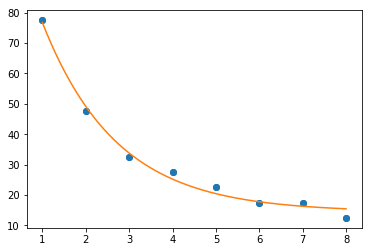

In [22]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math
r=np.array([1,2,3,4,5,6,7,8])
peak=np.array([77.5, 47.5, 32.5, 27.5, 22.5, 17.5, 17.5, 12.5])
X = np.linspace(r[0], r[-1], 1000)

plt.scatter(r, peak)
def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c


popt, pcov = curve_fit(exponenial_func, r, peak, p0=(1, 1e-6, 1))

xx = np.linspace(1, 8, 1000)
yy = exponenial_func(xx, *popt)
plt.plot(r,peak,'o', xx, yy)

# plt.scatter(r, peak)
plt.show()

In [20]:
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

import plotly.plotly as py
import plotly.graph_objs as go

# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
import numpy as np
from scipy.optimize import curve_fit



r=np.array([1,2,3,4,5,6,7,8])
peak=np.array([77.5, 47.5, 32.5, 27.5, 22.5, 17.5, 17.5, 12.5])
def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c


popt, pcov = curve_fit(exponenial_func, x, y, p0=(1, 1e-6, 1))

xx = np.linspace(1, 8, 1000)
yy = exponenial_func(xx, *popt)

plt.plot(x,y,'o', xx, yy)
pylab.title('Exponential Fit')
ax = plt.gca()
ax.set_axis_bgcolor((0.898, 0.898, 0.898))
fig = plt.gcf()
py.plot_mpl(fig, filename='Exponential-Fit-with-matplotlib')

ModuleNotFoundError: No module named 'plotly'